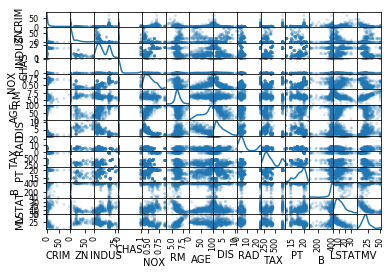

0.700802595269
0.742046438836
[[  0.00000000e+00   7.75057174e-03  -2.35960792e-03   2.57484629e+00
   -1.68469968e+01   3.72729015e+00  -3.99031483e-03  -1.29139356e+00
    2.53897713e-01  -8.61721536e-01   7.43423389e-03  -5.56870381e-01
   -1.22315623e-02]]
[ 36.22581514]
0.700801104156
0.74207616012
[[  0.00000000e+00   7.79751351e-03  -3.17168048e-03   2.56954850e+00
   -1.66477358e+01   3.72859147e+00  -4.14773927e-03  -1.28852574e+00
    2.53560132e-01  -8.59562266e-01   7.46008889e-03  -5.57118887e-01
   -1.22499126e-02]]
[ 36.08037393]


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

df = pd.read_excel('boston.xls').astype('float64')
df = df[(df['ZN'] <= (df['ZN'].mean() + 3*df['ZN'].std())) & (df['ZN'] >= (df['ZN'].mean() - 3*df['ZN'].std())) ]
df = df[(df['B'] <= (df['B'].mean() + 3*df['B'].std())) & (df['B'] >= (df['B'].mean() - 3*df['B'].std()))]
df = df[(df['TAX'] <= (df['TAX'].mean() + 3*df['TAX'].std())) & (df['TAX'] >= (df['TAX'].mean() - 3*df['TAX'].std()))]
X = df[['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PT', 'B', 'LSTAT','TAX']]
Y = df.iloc[:,-1].values.reshape(-1,1)
poly = PolynomialFeatures(degree = 1)
X_poly = poly.fit_transform(X)
#print(Y.shape)
X_train,X_test,y_train,y_test = train_test_split(X_poly,Y,random_state=0)
#print(X_train.shape)
#print(y_train.shape)
plt.figure()
scatter_matrix(df, alpha=0.2, diagonal='kde')
plt.show()
Linreg = LinearRegression().fit(X_train,y_train)
print(Linreg.score(X_train,y_train))
print(Linreg.score(X_test,y_test))
print(Linreg.coef_)
print(Linreg.intercept_)

Linridge = Ridge(alpha=0.0125).fit(X_train,y_train)
print(Linridge.score(X_train,y_train))
print(Linridge.score(X_test,y_test))
print(Linridge.coef_)
print(Linridge.intercept_)

In [31]:
from sklearn.linear_model import Lasso

Linlasso = Lasso(alpha=.01, max_iter= 1000).fit(X_train,y_train)
print(Linlasso.score(X_train,y_train))
print(Linlasso.score(X_test,y_test))
print(Linlasso.coef_)
print(Linlasso.intercept_)

0.70033142507
0.741658035975
[  0.00000000e+00   8.51516617e-03  -1.48014929e-02   2.35616860e+00
  -1.33898326e+01   3.72800937e+00  -6.22801397e-03  -1.23578383e+00
   2.49105121e-01  -8.25453738e-01   7.88444324e-03  -5.63408275e-01
  -1.26276618e-02]
[ 33.84600928]


0.988329796053
0.885820888663
[ 0.          0.00854108  0.02754154  0.00100192  0.0674738   0.20517901
  0.11160759  0.17638149  0.01899488  0.05935496  0.07963265  0.19587247
  0.04841862]


C:\Users\anees\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


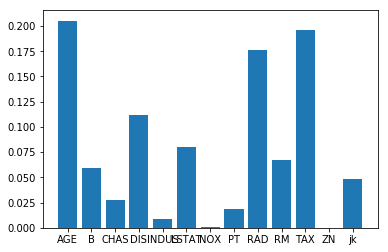

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


#grid_values = {'max_features': range(5,12,2)}
clf = GradientBoostingRegressor(learning_rate =0.1,n_estimators = 80,max_depth=4,random_state=0)
#gsearch = GridSearchCV(clf,param_grid = grid_values,cv=5)
#gsearch.fit(X_train,y_train)
#print(gsearch.grid_scores_)
#print(gsearch.best_score_)
#print(gsearch.best_params_)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(clf.feature_importances_)
feature_names = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'PT', 'B', 'LSTAT','TAX','jk']
plt.figure()
plt.bar(feature_names,clf.feature_importances_)
plt.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor



#grid_values = {'max_features': range(5,12,2)}
clf = RandomForestRegressor(n_estimators = 100,random_state=0)
#gsearch = GridSearchCV(clf,param_grid = grid_values,cv=5)
#gsearch.fit(X_train,y_train)
#print(gsearch.grid_scores_)
#print(gsearch.best_score_)
#gsearch.fit(X_train,y_train)
#print(gsearch.grid_scores_)
#print(gsearch.best_params_)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(clf.feature_importances_)

C:\Users\anees\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.979348681649
0.868613121976
[ 0.          0.00265481  0.01135873  0.00120077  0.03001648  0.32747281
  0.01884096  0.09412649  0.0036755   0.02140319  0.01333778  0.45442378
  0.0214887 ]


In [34]:
from sklearn.svm import SVR

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
C = [0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
gammas =[0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,1,1.1,1.2,1.3,1.4,1.5]
param_grid = {'C':C,'gamma':gammas}
msl = SVR(kernel='poly',C=14,gamma=1)
#gsearch = GridSearchCV(msl,param_grid = param_grid,cv=5)
#gsearch.fit(X_train_scaled,y_train)
#print(gsearch.grid_scores_)
#print(gsearch.best_score_)
#print(gsearch.best_params_)


In [35]:
msl.fit(X_train_scaled,y_train)
print(msl.score(X_train_scaled,y_train))
print(msl.score(X_test_scaled,y_test))

0.906796879942
0.852100728298


C:\Users\anees\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


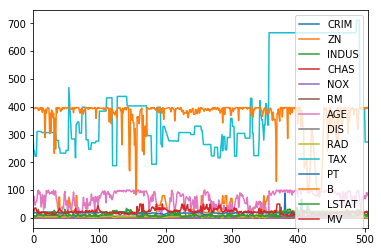

In [36]:
plt.figure()
df.plot()
plt.show()

In [39]:
df.describe()
df.shape

(468, 14)

In [40]:
468/506

0.924901185770751